# Result Interpretation 
This is a very rough draft - seeking feedback.

The writing is poor and the plots are badly formatted - just trying to convey my idea for the format :)


## Imports
Generic imports used by all code below

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plotting_utils import *
from stats_tests import *
from dataset import Dataset

import sys

if 'google.colab' in sys.modules:
  !pip install pingouin
  !git clone https://github.com/orion-junkins/eeg-connectivity.git
  sys.path.append('/content/eeg-connectivity')

## Load datasets
Load both entropy connectivity metrics for all subjects.

In [2]:
entropy_dataset = Dataset('connectivity_scores_shannon_entropy', novice_excludes=["14"], entropy_analysis=True)

### *Add section here with pre-processing overview*



### *Add section here with basic dataset exploration*



## Result 1:
### Increased Low Alpha Entropy when using gestures during demonstrations

First, reproduce the multiple anova. Consider Group A as experts and Group B as novices. Consider condition 1 as with gestures, and condition 2 as without. Consider Low Alpha (8.0 to 10.0) frequencies. 

First, view the condition p values for Baseline data:

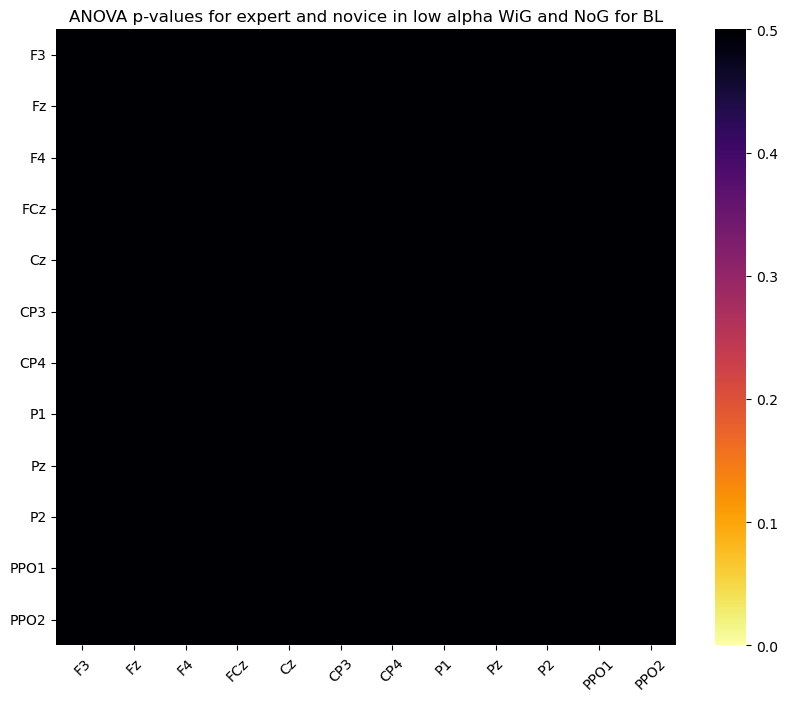

In [3]:
group_a = "expert"
group_b = "novice"
condition_1 = "WiG"
condition_2 = "NoG"
freq = "low alpha"
demo_condition = "BL"

group_a_condition_1_BL = entropy_dataset.get_frequency_average(group_a, demo_condition, condition_1, freq)
group_a_condition_2_BL = entropy_dataset.get_frequency_average(group_a, demo_condition, condition_2, freq)

group_b_condition_1_BL = entropy_dataset.get_frequency_average(group_b, demo_condition, condition_1, freq)
group_b_condition_2_BL = entropy_dataset.get_frequency_average(group_b, demo_condition, condition_2, freq)

# Run ANOVA tests
p_values_group, p_values_condition, p_values_interaction = run_anova(group_a_condition_1_BL, group_a_condition_2_BL, group_b_condition_1_BL, group_b_condition_2_BL)

plot_single_p_value_table(p_values_condition, entropy_dataset.electrode_names, title=f"ANOVA p-values for {group_a} and {group_b} in {freq} {condition_1} and {condition_2} for {demo_condition}")

Observe that there is nothing of significance.

Repeat the identical experiment but using demonstration data instead.

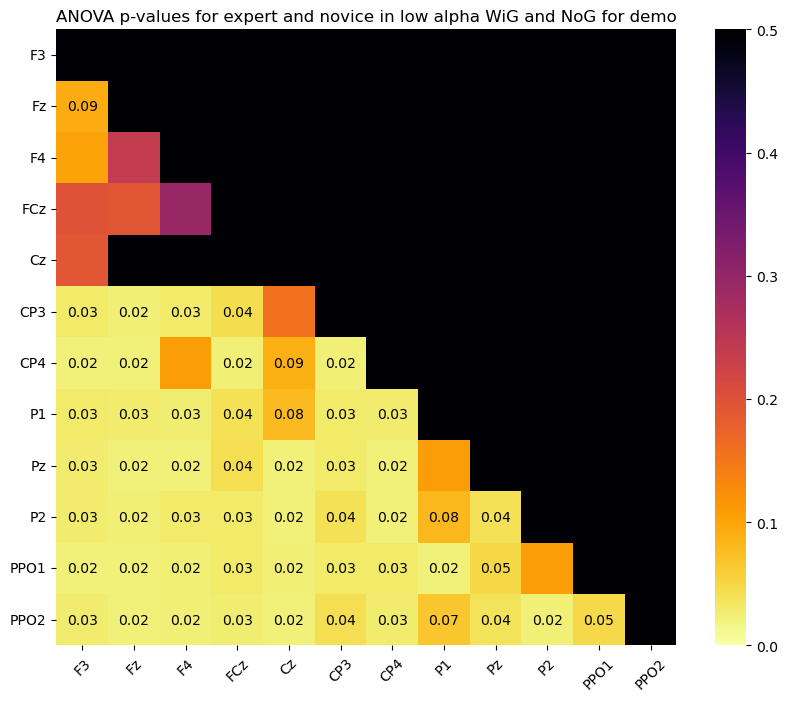

In [4]:
group_a = "expert"
group_b = "novice"
condition_1 = "WiG"
condition_2 = "NoG"
freq = "low alpha"
demo_condition = "demo"

group_a_condition_1_demo = entropy_dataset.get_frequency_average(group_a, demo_condition, condition_1, freq)
group_a_condition_2_demo = entropy_dataset.get_frequency_average(group_a, demo_condition, condition_2, freq)

group_b_condition_1_demo = entropy_dataset.get_frequency_average(group_b, demo_condition, condition_1, freq)
group_b_condition_2_demo = entropy_dataset.get_frequency_average(group_b, demo_condition, condition_2, freq)

# Run ANOVA tests
p_values_group, p_values_condition, p_values_interaction = run_anova(group_a_condition_1_demo, group_a_condition_2_demo, group_b_condition_1_demo, group_b_condition_2_demo)

plot_single_p_value_table(p_values_condition, entropy_dataset.electrode_names, title=f"ANOVA p-values for {group_a} and {group_b} in {freq} {condition_1} and {condition_2} for {demo_condition}")

In [5]:
def plot_condition_diff_avg(group_a_condition_1, group_a_condition_2, group_b_condition_1, group_b_condition_2, dataset, title="Condition 2 - Condition 1"):
    group_a_diff = group_a_condition_2 - group_a_condition_1

    group_b_diff = group_b_condition_2 - group_b_condition_1

    all_diffs = np.concatenate((group_a_diff, group_b_diff))

    all_diffs_avg = np.mean(all_diffs, axis=0)

    # Set a fixed vmin and vmax with large size
    sns.heatmap(all_diffs_avg, cmap="inferno_r", center=0, vmin=-0.025, vmax=0.025, annot=True, fmt=".3f", annot_kws={"fontsize": 8})

    # Set the figure size
    plt.gcf().set_size_inches(10, 10)

    # Use dataset.electrode_names for the ticklabels, shifting slightly to be centered in each col
    plt.xticks(np.arange(len(dataset.electrode_names)), dataset.electrode_names, rotation=0, fontsize=8, ha="left")
    plt.yticks(np.arange(len(dataset.electrode_names)), dataset.electrode_names, rotation=0, fontsize=8, va="top")
    
    plt.title(title)
    plt.show()


To understand the directionality of the relationship, plot the average difference. For each subject, compute the difference between their with gesture and without gesture average entropy. For all subjects, find the average in both baseline and demo data.

First, view the baseline difference. Since none of the p-values were significant, it is expected that these values will be close to 0.

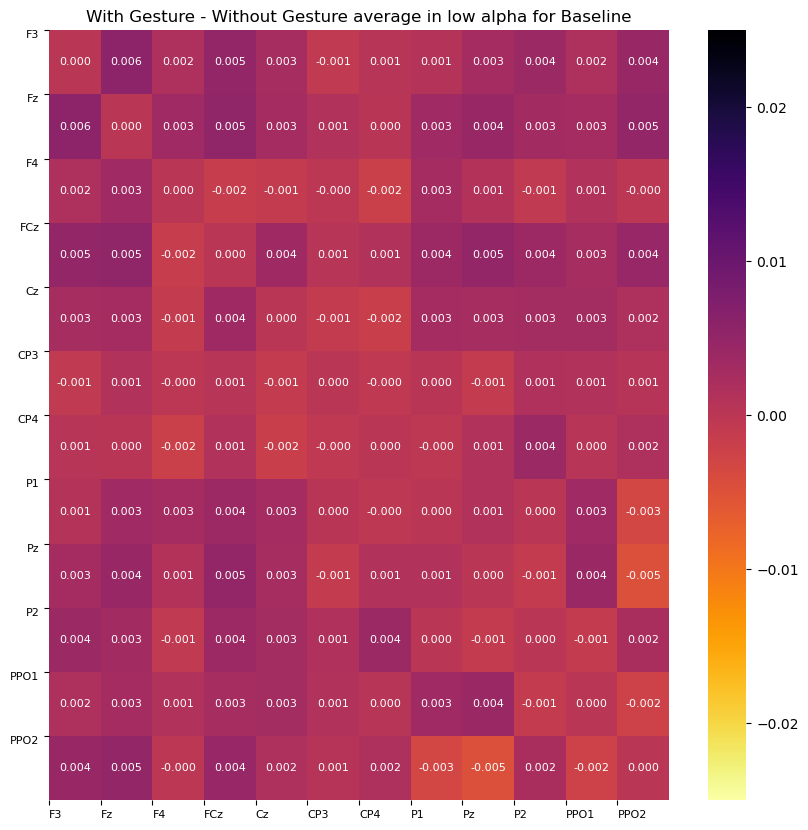

In [6]:
plot_condition_diff_avg(group_a_condition_1_BL, group_a_condition_2_BL, group_b_condition_1_BL, group_b_condition_2_BL, entropy_dataset, title=f"With Gesture - Without Gesture average in {freq} for Baseline")

Now, view the same values but for the demonstration

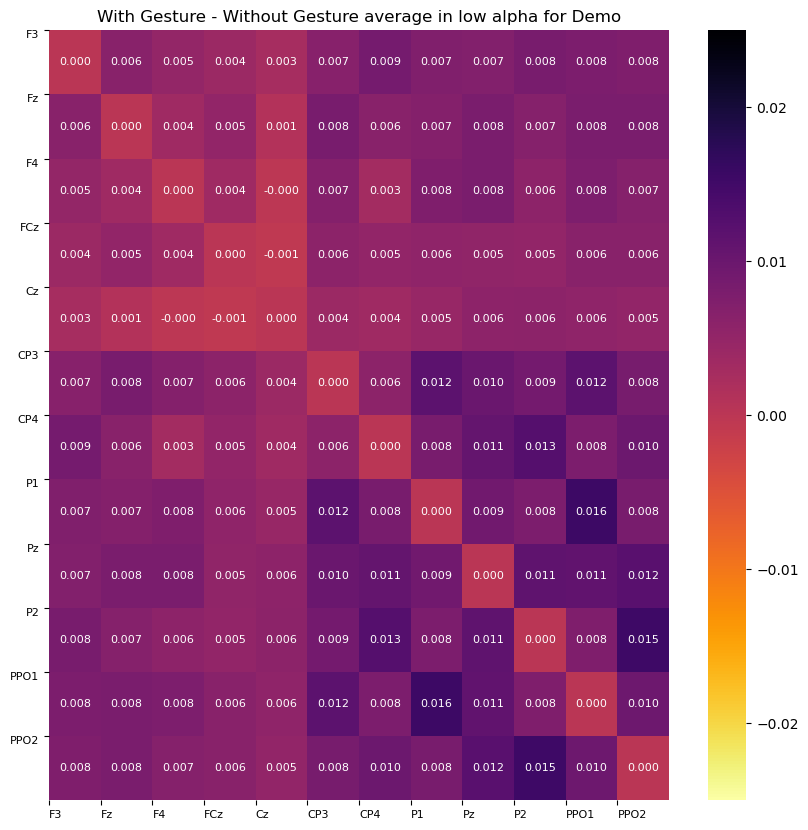

In [7]:
plot_condition_diff_avg(group_a_condition_1_demo, group_a_condition_2_demo, group_b_condition_1_demo, group_b_condition_2_demo, entropy_dataset, title=f"With Gesture - Without Gesture average in {freq} for Demo")

Note that there are large positive values indicating that the connectivity metric is higher when using gestures, particularly for electrodes on, or connecting to, the parietal and posterior parietal-occipital regions.

Thus, these results indicate that connectivity is higher for these electrodes when using gestures.

### Related Literature
Parietal cortex is associated with motor control [(source)](https://psycnet.apa.org/record/2005-16493-001) and attention regulation [(source)](https://pubmed.ncbi.nlm.nih.gov/15082327/).

In general, Alpha connectivity is shown to decrease during cognitively challenging tasks [(source)](https://link.springer.com/article/10.1007/s12144-024-06577-2).

Alpha connectivity is also shown to decrease during voluntary movements: "Voluntary movement results in a circumscribed desynchronization in the upper alpha and lower beta bands, localized close to sensorimotor areas" [(source)](https://www.sciencedirect.com/science/article/pii/S1388245799001418?via%3Dihub).

Gesture usage has been shown to facilitate cognitive processing [(source)](https://faculty.washington.edu/losterho/Compass.pdf) [(source)](https://www.frontiersin.org/journals/human-neuroscience/articles/10.3389/fnhum.2020.00323/full).

Speakers gesture more when cognitive load is increased [(source)](https://www.tandfonline.com/doi/abs/10.1080/01690960600696916).

### Possible Conclusions
Gesticulation may help to facilitate cognitive processing by helping the brain shift from a resting state to an active processing state. Specifically, movement itself supports alpha de-synchronization, helping to focus on a task. Inhibiting hand gestures may inhibit this alpha de-synchronization, particularly in regions responsible for attention management. This failure to de-synchronize may reduce subjects ability to fully engage in a cognitive task.

### Limitations/Considerations/Open Questions
It could be that subjects are simply using more gestures during the challenging task as [(source)](https://www.tandfonline.com/doi/abs/10.1080/01690960600696916) points out. 
It would be interesting to study the performance when gestures are allowed vs restricted to see if there is a dip due to the inhibition of de-synchronization.

# Result 2: ...

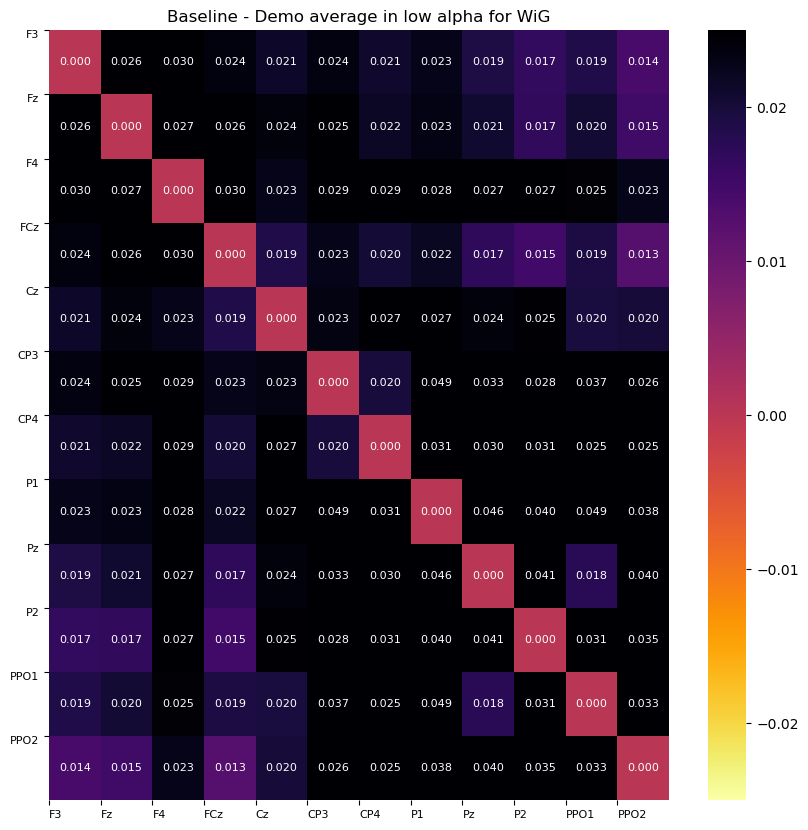

In [8]:
plot_condition_diff_avg(group_a_condition_1_demo, group_a_condition_1_BL, group_b_condition_1_demo, group_b_condition_1_BL, entropy_dataset, title=f"Baseline - Demo average in {freq} for WiG")

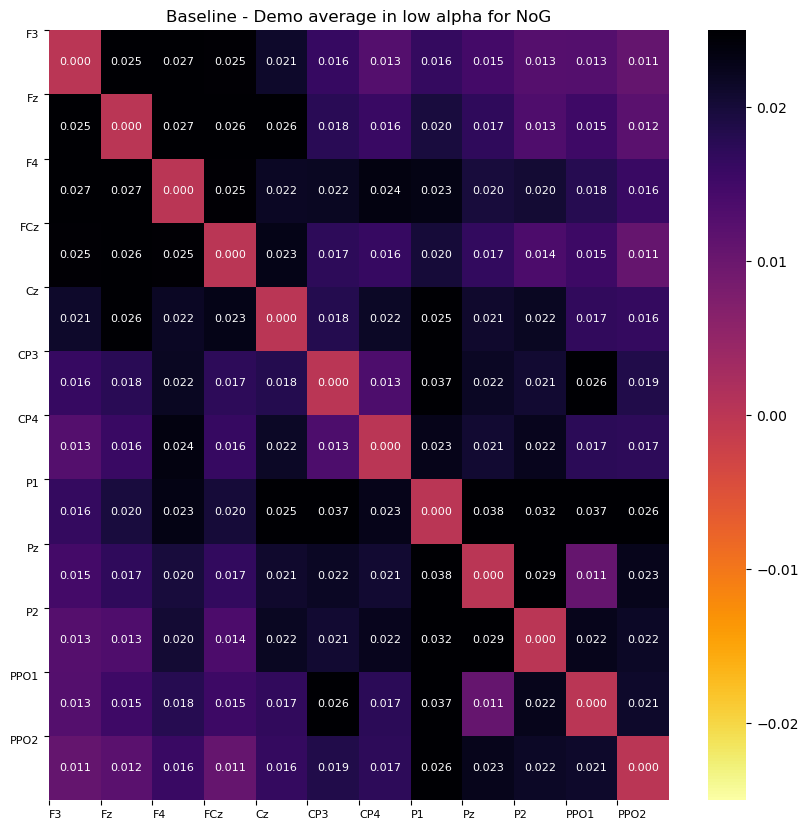

In [9]:
plot_condition_diff_avg(group_a_condition_2_demo, group_a_condition_2_BL, group_b_condition_2_demo, group_b_condition_2_BL, entropy_dataset, title=f"Baseline - Demo average in {freq} for NoG")